# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

Projeto realizado como requisito parcial para conclusão da disciplina de ICD


Alunos: 

    Deivison Rodrigues Jordão
    Lucas Miranda de Aguiar
    Filipe de Medeiros Santos
    

## Agrupamento (Kmeans)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
db = pd.read_csv("healthcare-dataset-stroke-data.csv")

db.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
db.dropna(inplace=True)

db.shape

(4909, 12)

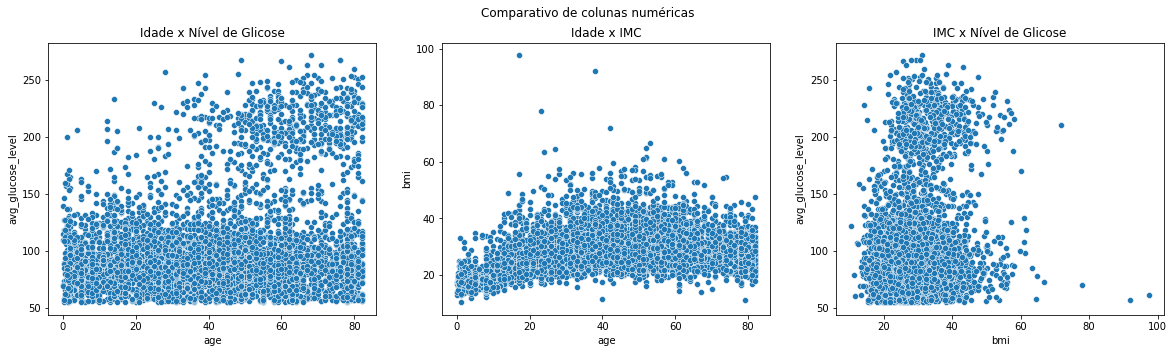

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Comparativo de colunas numéricas')

sns.scatterplot(ax=axes[0], x='age', y='avg_glucose_level', data=db)
axes[0].set_title('Idade x Nível de Glicose')

sns.scatterplot(ax=axes[1], x='age', y='bmi', data=db)
axes[1].set_title('Idade x IMC')

sns.scatterplot(ax=axes[2], x='bmi', y='avg_glucose_level', data=db)
axes[2].set_title('IMC x Nível de Glicose');

Dada a distribuição dos dados com relação as colunas que contém valores contínuos, se configura inviável o agrupamento dos pontos baseado no dataset completo.

### Análise separadamente

In [5]:
def group_KMeans(df,X,Y,n):
    Group = df[[X,Y]]
    Kmeans = KMeans(n_clusters = n)
    Kmeans.fit(Group)
    sns.scatterplot(data = Group,x = X ,y = Y,hue = Kmeans.labels_,palette = "muted")

Analisando o agrupamento **age(idade)** com **bmi(imc)** de quem teve avc:

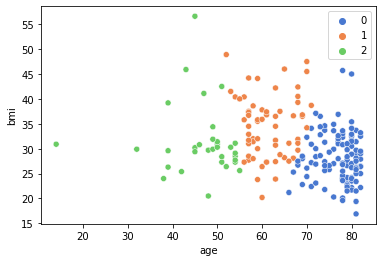

In [6]:
group = db[db.stroke == 1]
group_KMeans(group,"age", "bmi",3)

De todo o database:

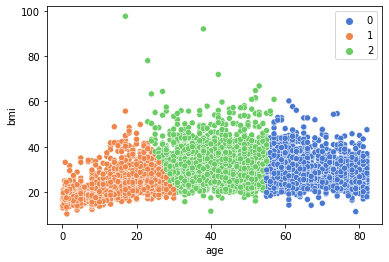

In [7]:
group_KMeans(db,"age", "bmi",3)

Podemos observar que o kmeans aqui não é tão importante, pois ele não nos da nenhuma informação revelante. Uma vez que o bmi não varia tanto em relação a idade.
Ex: Uma pessoa de 20 anos pode ter o mesmo bmi de uma pessoa 60 ou até mesmo 80.

Analisando o agrupamento **age (idade)** com **avg_glucose_level (nível de glicose)** de quem teve avc:

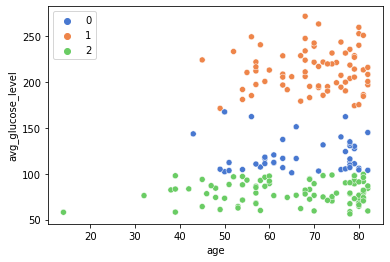

In [8]:
group_KMeans(group,"age", "avg_glucose_level",3)

De todo o database:

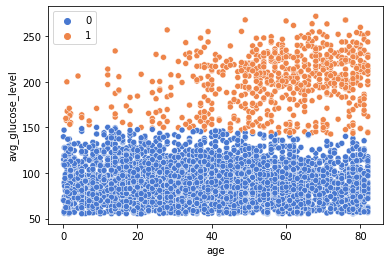

In [9]:
group_KMeans(db,"age", "avg_glucose_level",2)

Mais uma vez o KMeans não tem relevância nenhuma ao ser aplicado a esses parâmetros,uma vez que, não traz nenhuma informação ou agrupamento que tenha um fundamento lógico. Dividindo apenas os pontos em alta e baixa taxa de glicose.

Analisando o agrupamento **bmi (imc)** com **avg_glucose_level (nível de glicose)** de quem teve avc:

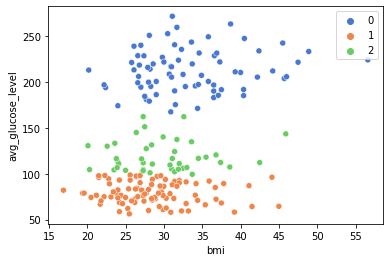

In [10]:
group_KMeans(group,"bmi", "avg_glucose_level",3)

De todo o database:

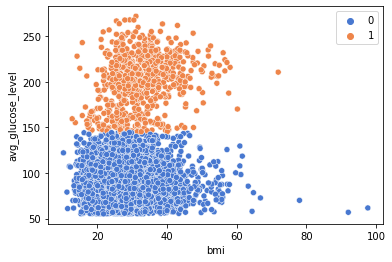

In [11]:
group_KMeans(db,"bmi", "avg_glucose_level",2)

Como visto anteriormente, o kmeans separou os grupos de acordo com o nivel de glicose. Observa-se que as pessoas que mantém o nível de glicose normal tendem a ter menos chance de sofrer um avc.

Analisando o agrupamento bmi com avg_glucose_level (nível de glicose) de quem teve 
avc e uma relação a heart_disease (doença do coração):

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

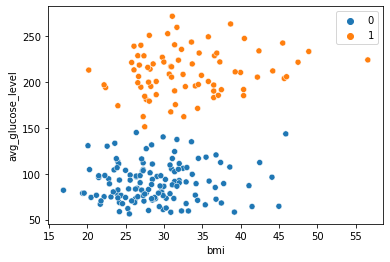

In [12]:
stroke_1 = db[db.stroke==1]
kmeans = KMeans(n_clusters=2)
kmeans.fit(stroke_1[['bmi', 'avg_glucose_level']])

sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_1, hue=kmeans.labels_)

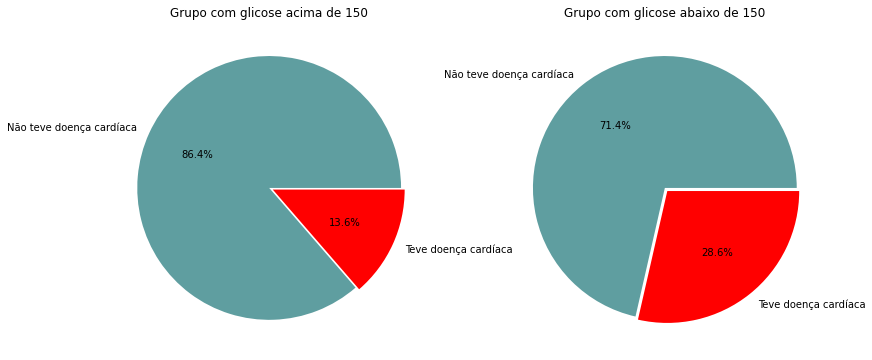

In [13]:
groups = pd.DataFrame({'Grupo 0': stroke_1[kmeans.labels_ == 0].heart_disease.value_counts(),
                       'Grupo 1': stroke_1[kmeans.labels_ == 1].heart_disease.value_counts()})
groups = groups.rename({0:'Não teve doença cardíaca', 1:'Teve doença cardíaca'})

ax = groups.plot.pie(subplots= True, figsize= (13,7), explode=(0, 0.03),
                     legend=False, autopct='%1.1f%%',colors= ['cadetblue','r'])

ax[0].set_title("Grupo com glicose acima de 150")
ax[0].set_ylabel("")
ax[1].set_title("Grupo com glicose abaixo de 150")
ax[1].set_ylabel("");

O único padrão encontrado foi o baixo risco de distúrbios cardíacos 
no grupo de pessoas entre aquelas que tiveram AVC e com o nível de glicose abaixo de 150

##### Conclusões:

Conclui-se a partir das análises realizadas, pela inviabilidade da utilização do algoritmo kmeans para o agrupamento dos pontos contidos no dataset e por sua ineficácia dentro desta pesquisa.